Text(0.5, 0, 'time (sec)')

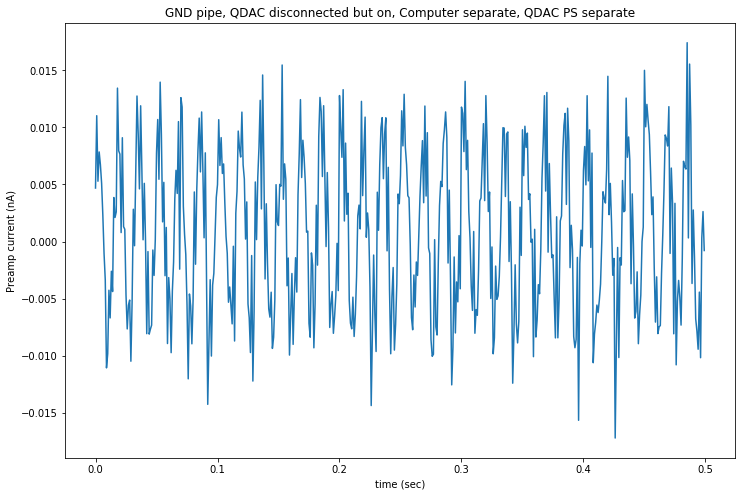

In [32]:
import nidaqmx
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from nidaqmx.constants import AcquisitionType as AcqType
from nidaqmx.constants import TerminalConfiguration as TermConfig
%matplotlib inline

#Constant values

gain = 1e8 # gain of the preamps

# Data collection with NIDAQ at maximum sampling rate

rs_acqu = 1e6 # sampling rate in Hz
t_acqu = 0.5 # acquisition time in second
ns_acqu = int(rs_acqu*t_acqu)
t = np.arange(start=0, stop=t_acqu, step=1/rs_acqu)


with nidaqmx.Task() as acqu_task:
    # Set acquisition channels and specs
    # Change the voltage range if necessary
    acqu_task.ai_channels.add_ai_voltage_chan("Dev1/ai0",terminal_config=TermConfig.DIFFERENTIAL,min_val=-1,max_val=1)
    acqu_task.timing.cfg_samp_clk_timing(rs_acqu,sample_mode=AcqType.FINITE,samps_per_chan=ns_acqu)

    # Start acquisition
    acqu_task.start()
    
    # Collect the data measured
    current_i = acqu_task.read(number_of_samples_per_channel=ns_acqu)
    current_i = 1e9*np.array(current_i)/gain # voltage to actual current (in nA) conversion

    # Stop acquisition
    acqu_task.stop()

# Averaging to get a desired sampling rate (Similar to sampling rate conversion)

rs_desired = 1e3 #desired sampling rate
n_pointstoaverage = int(rs_acqu/rs_desired) # number of points to be averaged
ns_desired = int(rs_desired*t_acqu) # total number of points for the collected signal in the desired rate
t_desired = np.arange(start=0, stop=t_acqu, step=1/rs_desired)
i_desired = np.zeros(ns_desired)

titlestr='GND pipe, QDAC disconnected but on, Computer separate, QDAC PS separate'

for index in np.arange(ns_desired):
    i_desired[index] = current_i[index*n_pointstoaverage:(index+1)*n_pointstoaverage].mean()
    
plt.figure(figsize=(12,8))
plt.plot(t_desired, i_desired)
plt.title(titlestr)
plt.ylabel('Preamp current (nA)')
plt.xlabel('time (sec)')

Text(0.5, 0, 'time (sec)')

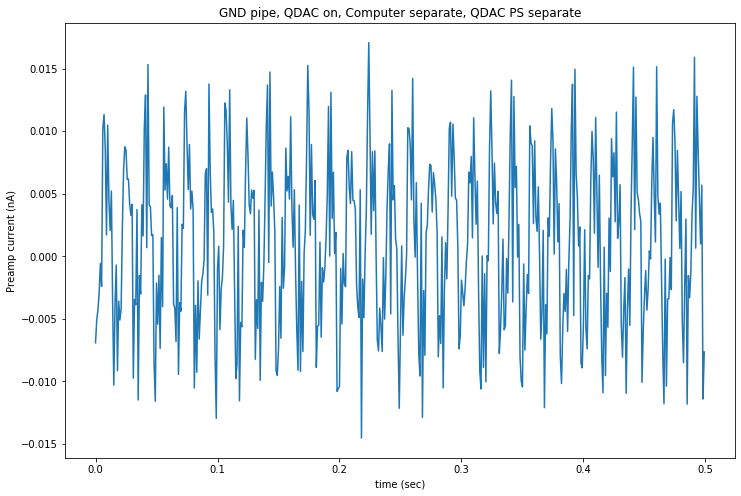

In [33]:
import nidaqmx
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from nidaqmx.constants import AcquisitionType as AcqType
from nidaqmx.constants import TerminalConfiguration as TermConfig
%matplotlib inline

#Constant values

gain = 1e8 # gain of the preamps

# Data collection with NIDAQ at maximum sampling rate

rs_acqu = 1e6 # sampling rate in Hz
t_acqu = 0.5 # acquisition time in second
ns_acqu = int(rs_acqu*t_acqu)
t = np.arange(start=0, stop=t_acqu, step=1/rs_acqu)


with nidaqmx.Task() as acqu_task:
    # Set acquisition channels and specs
    # Change the voltage range if necessary
    acqu_task.ai_channels.add_ai_voltage_chan("Dev1/ai0",terminal_config=TermConfig.DIFFERENTIAL,min_val=-1,max_val=1)
    acqu_task.timing.cfg_samp_clk_timing(rs_acqu,sample_mode=AcqType.FINITE,samps_per_chan=ns_acqu)

    # Start acquisition
    acqu_task.start()
    
    # Collect the data measured
    current_i = acqu_task.read(number_of_samples_per_channel=ns_acqu)
    current_i = 1e9*np.array(current_i)/gain # voltage to actual current (in nA) conversion

    # Stop acquisition
    acqu_task.stop()

# Averaging to get a desired sampling rate (Similar to sampling rate conversion)

rs_desired = 1e3 #desired sampling rate
n_pointstoaverage = int(rs_acqu/rs_desired) # number of points to be averaged
ns_desired = int(rs_desired*t_acqu) # total number of points for the collected signal in the desired rate
t_desired = np.arange(start=0, stop=t_acqu, step=1/rs_desired)
i_desired = np.zeros(ns_desired)

titlestr='GND pipe, QDAC on, Computer separate, QDAC PS separate'

for index in np.arange(ns_desired):
    i_desired[index] = current_i[index*n_pointstoaverage:(index+1)*n_pointstoaverage].mean()
    
plt.figure(figsize=(12,8))
plt.plot(t_desired, i_desired)
plt.title(titlestr)
plt.ylabel('Preamp current (nA)')
plt.xlabel('time (sec)')

Text(0.5, 0, 'time (sec)')

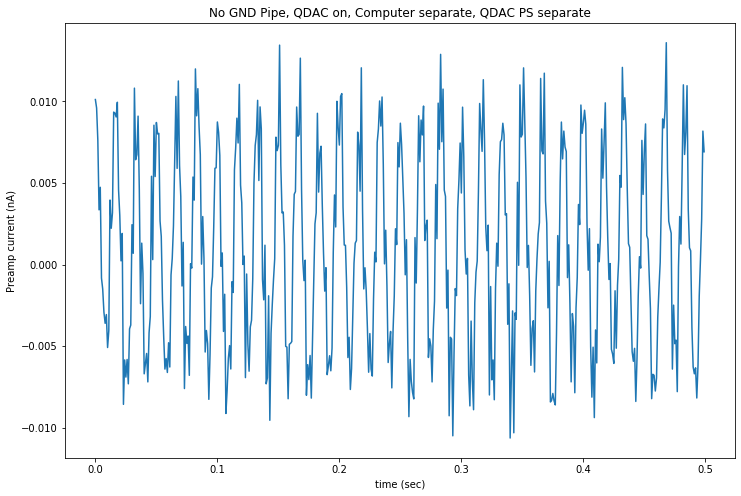

In [37]:
import nidaqmx
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from nidaqmx.constants import AcquisitionType as AcqType
from nidaqmx.constants import TerminalConfiguration as TermConfig
%matplotlib inline

#Constant values

gain = 1e8 # gain of the preamps

# Data collection with NIDAQ at maximum sampling rate

rs_acqu = 1e6 # sampling rate in Hz
t_acqu = 0.5 # acquisition time in second
ns_acqu = int(rs_acqu*t_acqu)
t = np.arange(start=0, stop=t_acqu, step=1/rs_acqu)


with nidaqmx.Task() as acqu_task:
    # Set acquisition channels and specs
    # Change the voltage range if necessary
    acqu_task.ai_channels.add_ai_voltage_chan("Dev1/ai0",terminal_config=TermConfig.DIFFERENTIAL,min_val=-1,max_val=1)
    acqu_task.timing.cfg_samp_clk_timing(rs_acqu,sample_mode=AcqType.FINITE,samps_per_chan=ns_acqu)

    # Start acquisition
    acqu_task.start()
    
    # Collect the data measured
    current_i = acqu_task.read(number_of_samples_per_channel=ns_acqu)
    current_i = 1e9*np.array(current_i)/gain # voltage to actual current (in nA) conversion

    # Stop acquisition
    acqu_task.stop()

# Averaging to get a desired sampling rate (Similar to sampling rate conversion)

rs_desired = 1e3 #desired sampling rate
n_pointstoaverage = int(rs_acqu/rs_desired) # number of points to be averaged
ns_desired = int(rs_desired*t_acqu) # total number of points for the collected signal in the desired rate
t_desired = np.arange(start=0, stop=t_acqu, step=1/rs_desired)
i_desired = np.zeros(ns_desired)

titlestr='No GND Pipe, QDAC on, Computer separate, QDAC PS separate'

for index in np.arange(ns_desired):
    i_desired[index] = current_i[index*n_pointstoaverage:(index+1)*n_pointstoaverage].mean()
    
plt.figure(figsize=(12,8))
plt.plot(t_desired, i_desired)
plt.title(titlestr)
plt.ylabel('Preamp current (nA)')
plt.xlabel('time (sec)')

Text(0.5, 0, 'time (sec)')

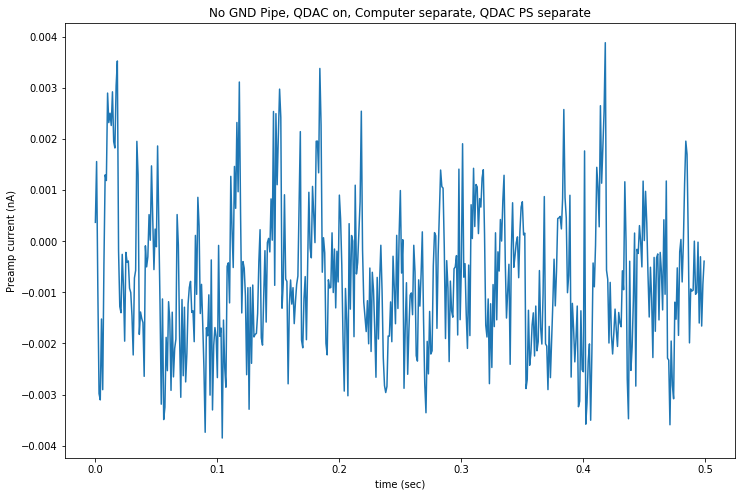

In [70]:
import nidaqmx
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from nidaqmx.constants import AcquisitionType as AcqType
from nidaqmx.constants import TerminalConfiguration as TermConfig
%matplotlib inline

#Constant values

gain = 1e9 # gain of the preamps

# Data collection with NIDAQ at maximum sampling rate

rs_acqu = 1e6 # sampling rate in Hz
t_acqu = 0.5 # acquisition time in second
ns_acqu = int(rs_acqu*t_acqu)
t = np.arange(start=0, stop=t_acqu, step=1/rs_acqu)


with nidaqmx.Task() as acqu_task:
    # Set acquisition channels and specs
    # Change the voltage range if necessary
    acqu_task.ai_channels.add_ai_voltage_chan("Dev1/ai0",terminal_config=TermConfig.DIFFERENTIAL,min_val=-1,max_val=1)
    acqu_task.timing.cfg_samp_clk_timing(rs_acqu,sample_mode=AcqType.FINITE,samps_per_chan=ns_acqu)

    # Start acquisition
    acqu_task.start()
    
    # Collect the data measured
    current_i = acqu_task.read(number_of_samples_per_channel=ns_acqu)
    current_i = 1e9*np.array(current_i)/gain # voltage to actual current (in nA) conversion

    # Stop acquisition
    acqu_task.stop()

# Averaging to get a desired sampling rate (Similar to sampling rate conversion)

rs_desired =1e3 #desired sampling rate
n_pointstoaverage = int(rs_acqu/rs_desired) # number of points to be averaged
ns_desired = int(rs_desired*t_acqu) # total number of points for the collected signal in the desired rate
t_desired = np.arange(start=0, stop=t_acqu, step=1/rs_desired)
i_desired = np.zeros(ns_desired)

titlestr='No GND Pipe, QDAC on, Computer separate, QDAC PS separate'

for index in np.arange(ns_desired):
    i_desired[index] = current_i[index*n_pointstoaverage:(index+1)*n_pointstoaverage].mean()
    
plt.figure(figsize=(12,8))
plt.plot(t_desired, i_desired)
plt.title(titlestr)
plt.ylabel('Preamp current (nA)')
plt.xlabel('time (sec)')